In [136]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

print(df.shape)
df.sample()

(699, 38)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
521,독전: 익스텐디드 컷,20188042,2018-07-18,한국,한국,"범죄,액션",15세이상관람가,장편,일반영화,(주)용필름,(주)넥스트엔터테인먼트월드(NEW),5656.0,398.0,844714600.0,137775.0,236870200.0,37991.0,0,이해영,이해영,10058049.0,남자,감독,독전: 익스텐디드 컷|독전|경성학교: 사라진 소녀들|26년|페스티발|천하장사 마돈나...,이해영,이해영,이해영,10058049.0,남자,감독,독전: 익스텐디드 컷|독전|경성학교: 사라진 소녀들|26년|페스티발|천하장사 마돈나...,"조진웅,류준열,김주혁,김성령,박해준,차승원",조진웅,NaN,10067353,남자,배우,블랙머니|퍼펙트맨|광대들: 풍문조작단|클로즈 투 유(가제)|완벽한 타인|공작|독전:...


# F-rated

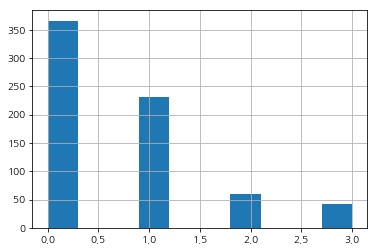

In [7]:
# F-rated 등급 별 영화 수, 비율(분석 전체 영화 대비) eg. 3등급은 n개고, 이건 n%. 2등급은 ….
df['F-rated'].hist()

In [8]:
data =df.groupby('F-rated')['영화코드'].size().reset_index()
F_rated_count = data.rename(columns={'영화코드': '영화 수'})
F_rated_count['전체 영화 중 비율(%)'] = round(F_rated_count['영화 수'] * 100/ sum(F_rated_count['영화 수']), 2)
F_rated_count

,F-rated,영화 수,전체 영화 중 비율(%)
0,0,366,52.36
1,1,231,33.05
2,2,60,8.58
3,3,42,6.01


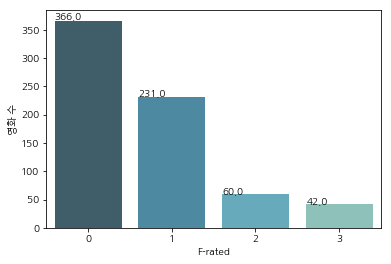

In [9]:
# F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

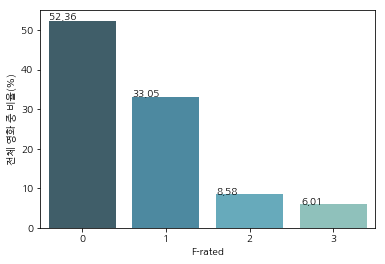

In [10]:
# F-rated 지수별 비율
ax = sns.barplot(x='F-rated', y='전체 영화 중 비율(%)', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

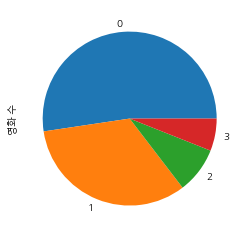

In [11]:
ax = F_rated_count['영화 수'].plot.pie()
# 컬러
# annotation

# 성비 - F-rated

### 대표감독 성별 - F-rated

In [12]:
# 대표감독 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['감독성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['감독성별'] == '여자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '여자']['영화 수'])
data.loc[data['감독성별'] == '남자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '남자']['영화 수'])
data['감독성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['감독성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,감독성별,F-rated,영화 수,감독성별 전체 영화 수,감독성별에 따른 F-rated 지수 비율(%)
0,남자,0,364,602.0,60.47
1,남자,1,218,602.0,36.21
2,남자,2,20,602.0,3.32
3,여자,1,12,94.0,12.77
4,여자,2,40,94.0,42.55
5,여자,3,42,94.0,44.68


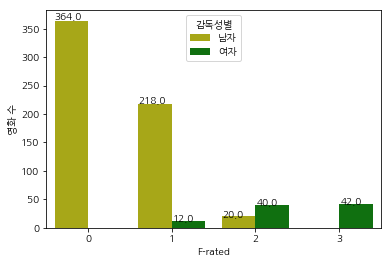

In [13]:
# 대표감독성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

남성 감독의 경우 F-rated 지수가 높아질수록 영화 수가 현저히 줄어드는데 반해, 

여성 감독의 경우 F-rated 지수가 높은 영화의 비중이 훨씬 높다

    → 여성 감독들이 남성 감독에 비해 여성 배우, 여성 작가와 협업하는 비율이 높다
    → 감독이 여성인 경우, 약 90% 가 주연배우나 작가 중 여성을 1 명 이상 기용한다

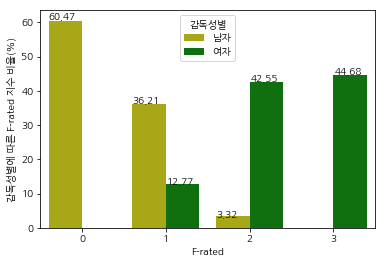

In [14]:
# 대표감독성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='감독성별에 따른 F-rated 지수 비율(%)',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

비율로 보면 감독성별에 따른 F-rated 차이가 훨씬 두드러진다

### 대표작가 성별 - F-rated

In [15]:
# 대표작가 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['작가성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['작가성별'] == '여자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '여자']['영화 수'])
data.loc[data['작가성별'] == '남자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '남자']['영화 수'])
data['작가성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['작가성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,작가성별,F-rated,영화 수,작가성별 전체 영화 수,작가성별에 따른 F-rated 지수 비율(%)
0,남자,0,311,443.0,70.20
1,남자,1,131,443.0,29.57
2,남자,2,1,443.0,0.23
3,여자,1,55,149.0,36.91
4,여자,2,52,149.0,34.90
5,여자,3,42,149.0,28.19


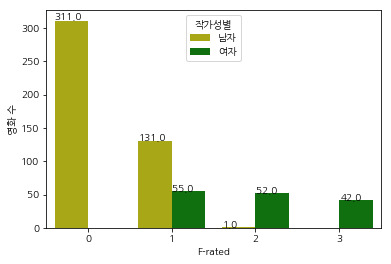

In [16]:
# 대표작가성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

대표 작가가 남성인 경우 F-rated 2등급이 거의 없다

    대표 작가가 남성인 경우, 대표 감독이 남성인 경우보다 F-rated 가 낮은 것을 알 수 있다

대표 작가가 여성인 경우, F-rated 등급은 고르게 퍼져있는 편

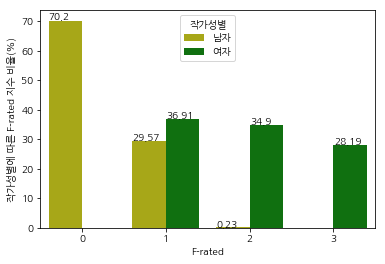

In [17]:
# 대표작가성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='작가성별에 따른 F-rated 지수 비율(%)',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

In [18]:
# 대표 감독이 곧 대표 작가인 경우
# print(df[df['감독코드'] == df['작가코드']].shape)
df[df['감독코드'] == df['작가코드']][['영화명', '대표감독']]
df[df['감독코드'] == df['작가코드']]['대표감독'].value_counts()

print('감독 == 작가: ')
print(df[df['감독코드'] == df['작가코드']]['감독성별'].value_counts())
print(' ')
print('감독 != 작가: ')
print(df[df['감독코드'] != df['작가코드']]['감독성별'].value_counts())
# df['감독성별'].value_counts()

감독 == 작가: 
남자    305
여자     58
Name: 감독성별, dtype: int64
 
감독 != 작가: 
남자    297
여자     36
Name: 감독성별, dtype: int64


대표감독이 곧 대표작가인 경우가 전체의 절반가량

감독성비 자체가 7:1로 기울어 있으므로 F-rated 가 쏠릴 수 밖에 없음

### 주연배우 성별 - F-rated

In [19]:
# 주연배우 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['배우성별'] == '여자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '여자']['영화 수'])
data.loc[data['배우성별'] == '남자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '남자']['영화 수'])
data['배우성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['배우성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,배우성별,F-rated,영화 수,배우성별 전체 영화 수,배우성별에 따른 F-rated 지수 비율(%)
0,남자,0,352,448.0,78.57
1,남자,1,65,448.0,14.51
2,남자,2,31,448.0,6.92
3,여자,1,164,234.0,70.09
4,여자,2,28,234.0,11.97
5,여자,3,42,234.0,17.95


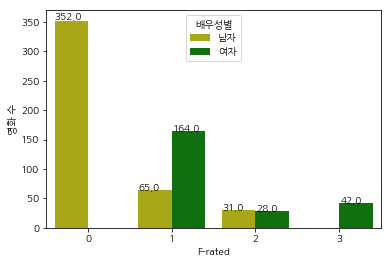

In [20]:
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

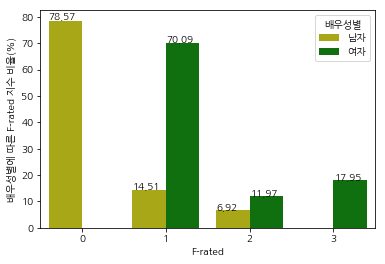

In [21]:
# 주연배우성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='배우성별에 따른 F-rated 지수 비율(%)',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

주연배우가 여성인 영화가 대표감독이나 대표작가가 여성인 영화에 비해 월등히 많다

    → 에로영화 때문인지 살펴보기

주연배우가 남성인 경우 대부분의 영화가 F-rated 지수 0 이다

    → 대표감독이나 대표작가가 남성인 영화에 비해 F-rated 지수 쏠림 현상이 더욱 심하다

### 여성주연이 많은 이유- 에로영화 때문인지 살펴보기

드라마, 다큐멘터리, 애니메이션이 전체의 50%
    
    에로영화는 대부분 [청소년관람불가-멜로/로맨스] 에 속하므로 에로영화 때문에 여성주연영화 중 F-rated 1 인 영화가 많았던 것은 아니다 

다큐멘터리, 애니메이션, 멜로/로맨스 에서 여성주연배우가 많음

In [183]:
df[df['F-rated'] == 1]['대표장르'].value_counts()

# len(df[df['F-rated'] == 1]['대표장르'])

드라마       68
다큐멘터리     45
애니메이션     26
멜로/로맨스    19
코미디       14
미스터리      13
스릴러       12
사극         8
공포(호러)     8
범죄         8
액션         4
가족         3
판타지        2
공연         1
Name: 대표장르, dtype: int64

### 등급-장르 뜯어보기

#### 등급별
전체관람가는 [다큐멘터리], [애니메이션]이 대부분

청소년관람불가는 두 분류로 나눌 수 있을 것
- [멜로/로맨스] -> 대부분 에로영화
- [드라마], [범죄], [스릴러], [액션], [미스터리], [코미디]

### 여성주연비율과 등급-장르의 관계
#### 여성주연 비율 높은 등급-장르
- 전체관람가: 애니메이션, 드라마, 다큐멘터리
- 12세이상관람가: 멜로/로맨스
- 15세이상관람가: 멜로/로맨스, 미스터리
- 청소년관람불가: 스릴러

    → 청소년관람불가-멜로/로맨스에서 여성주연비율이 급격히 줄어든 것은 에로영화 때문

    → 미스터리, 스릴러의 경우 여성주연일 때 더 무서우니까 그런가?

#### 여성주연 비율이 특히 낮은 등급-장르
- 전체관람가: 
- 12세이상관람가: 사극, 전쟁
- 15세이상관람가: 액션, 범죄, 코미디
- 청소년관람불가: 범죄

    → 전쟁, 액션, 범죄, 사극은 남성의 전유물
    
    → 코미디는 15세이상관람가에서 가장 영화수가 많고, 가장 여성주연비율이 낮다
        임창정, 정상훈, 공형진, 유해진, 최성국 등 코미디물을 전문으로하는 남성주연배우는 꽤 있는데, 코미디 여성주연배우는 풀 자체가 없는 듯
        
#### 특이점
[전체관람가-다큐멘터리]에서는 여성주연비율이 50% 가까이 되는데, 12세이상관람가와 15세이상관람가로 등급이 높아질수록 여성주연비율이 20% 대까지 낮아진다


[전체관람가-애니메이션]에서는 여성주연비율이 50% 이상인데, 나머지 등급에서는 여성주연이 거의 없다


[사극]에서는 여성주연 영화를 거의 찾아보기 힘들다 


등급, 장르 모두 파이가 작은 곳에서만 여성주연비율이 높은 것을 알 수 있다. 
    - 등급: 전체관람가, 청소년관람불가
    - 장르: 다큐멘터리, 애니메이션 (심지어 다큐멘터리는 배우가 나오지도 않음)
    
    → 유일하게 파이가 큰 분야에서 여성주연비율이 높은 건 [12세이상관람가-멜로/로맨스], [15세이상관람가-멜로/로맨스]

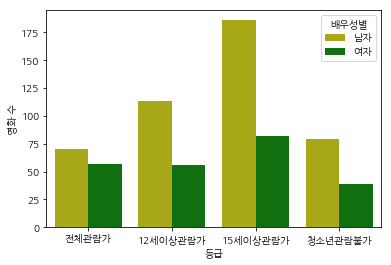

In [31]:
# 영화 등급별 주연배우 성비
data = df.groupby(['배우성별', '등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.barplot(y='영화 수', hue='배우성별', x='등급', data=data, order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), palette=['y', 'g'])

전체관람가에서 여성주연배우 비율이 높다

전체 영화수가 많은 등급일수록 (12세이상관람가, 15세이상관람가) 여성주연배우 비율이 낮다
    
    → 등급별로 장르를 구분해서 살펴보기

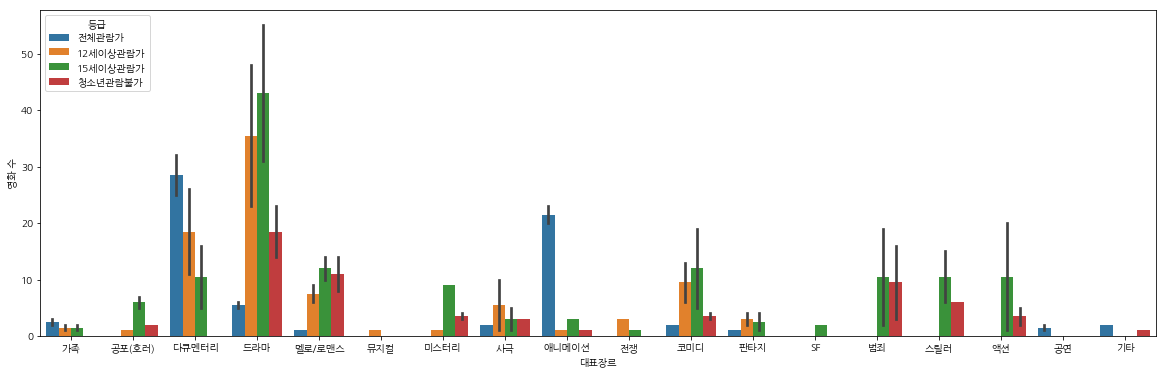

In [33]:
df['대표장르'] = df['장르'].apply(lambda x: str(x).split(',')[0])
df[df['등급'] == '전체관람가'][['영화명', '대표장르', '배우성별']]
df[df['등급'] == '전체관람가']['대표장르'].value_counts()
data = df.groupby(['등급', '대표장르', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data

plt.figure(figsize=[20, 6])
sns.barplot(x='대표장르', y='영화 수', hue='등급', hue_order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), data=data)

# plt.rcParams["figure.figsize"] = (10,5)
# data.plot(x='대표장르', y='영화 수', kind='bar', stacked=True)

<Figure size 1152x432 with 0 Axes>

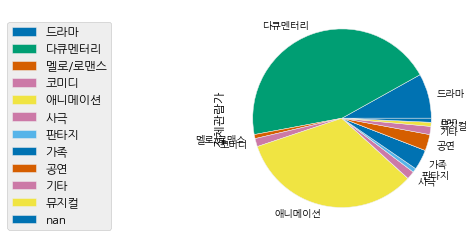

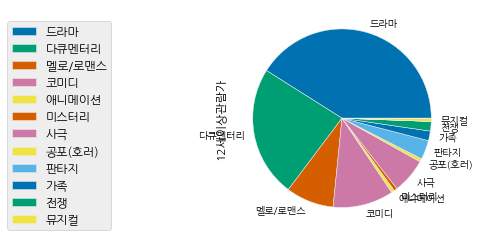

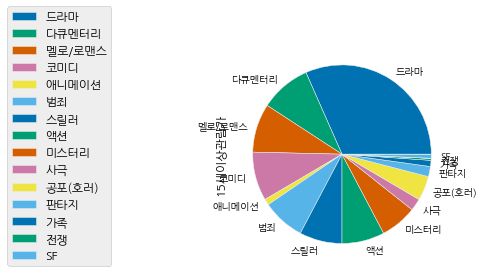

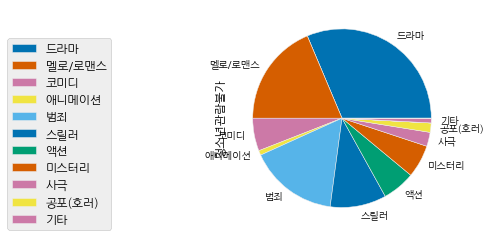

In [147]:
# 등급별 장르 파이차트

data = df[df['등급'] == '전체관람가'].groupby(['대표장르'])['영화코드'].size().reset_index().rename(columns={'영화코드': '영화 수'})
data = data.rename(columns={'영화 수':'전체관람가'})
data = data.merge(df[df['등급'] == '12세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'12세이상관람가'})
data = data.merge(df[df['등급'] == '15세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'15세이상관람가'})
data = data.merge(df[df['등급'] == '청소년관람불가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'청소년관람불가'})
data = data.merge(df.groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'전체등급'})
data

data_grade_genre = data.sort_values('전체등급', ascending=False).transpose().reset_index()
data_grade_genre.columns = data_grade_genre.iloc[0]
data_grade_genre = data_grade_genre.drop(data_grade_genre.index[0]).rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.fillna(0)
data_grade_genre = data_grade_genre.set_index('등급')

data_grade_genre
plt.figure(figsize=[16, 6])

# print(plt.style.available)
plt.style.use('seaborn-colorblind')
data_grade_genre.transpose().plot.pie(y='전체관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='12세이상관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='15세이상관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='청소년관람불가')
plt.legend(loc=[-1,0])

애니메이션은 대부분 전체관람가
다큐멘터리는 절반 정도 전체관람가, 나머지 절반은 12세이상관람가와 15세이상관람가

전체관람가를 제외한 모든 등급에서 드라마가 1순위

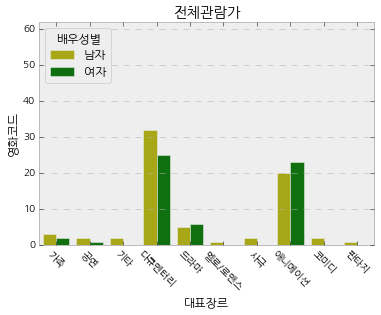

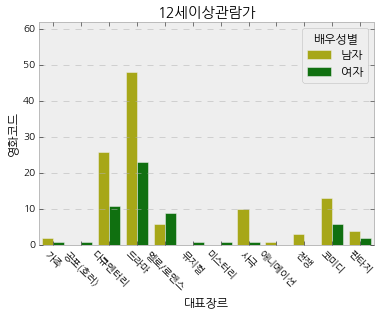

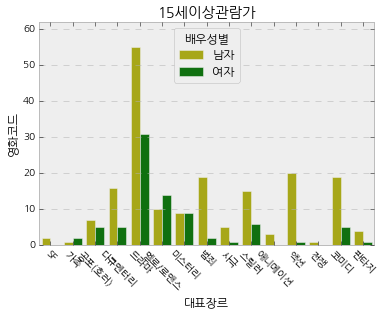

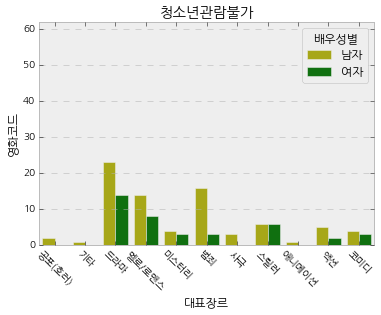

In [154]:
data = df.groupby(['대표장르', '등급', '배우성별'])['영화코드'].size().reset_index()

sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '전체관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('전체관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '12세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('12세이상관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '15세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('15세이상관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '청소년관람불가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('청소년관람불가')
plt.xticks(rotation=-45)
plt.show()

In [180]:
df[df['대표장르'] == '미스터리'][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '15세이상관람가') & (df['대표장르'] == '코미디')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '멜로/로맨스')][['등급', '영화명', '감독', '배우']]

df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '드라마')][['상영횟수', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '코미디')]['영화명']
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '멜로/로맨스')]['영화명']

df[(df['등급'] == '전체관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '15세이상관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]

df[(df['등급'] == '전체관람가') & (df['대표장르'] == '다큐멘터리')][['영화명', '감독', '주연배우','배우코드', '배우필모']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '다큐멘터리')][['영화명', '감독', '주연배우','배우코드', '배우필모']]


,영화명,감독,주연배우,배우코드,배우필모
13,망원동 인공위성,김형주,송호준,20220936,망원동 인공위성
41,명량: 회오리 바다를 향하여,"정세교,김한민",김한민,10006204,봉오동 전투|사냥|명량: 회오리 바다를 향하여|명량|최종병기 활 감독확장판|최종병기...
50,마이 페어 웨딩,장희선,김조광수,10005655,출장수사|악질경찰|조선명탐정: 흡혈괴마의 비밀|흔들리는 물결|마이 페어 웨딩|경성학...
97,춘희막이,박혁지,김춘희,20190130,춘희막이
112,울보 권투부,이일하,도꾜 조선 중고급학교 권투부,0,NaN
130,나쁜 나라,"김진열,이수정,정일건",최경덕,20228869,소공녀|나쁜 나라
166,독도의 영웅들,권순도,김승헌,20267635,NaN
192,업사이드 다운,김동빈,박영우,20248319,NaN
223,빅뱅 메이드,변진호,권지용,10069845,빅뱅 메이드|원 오브 어 카인드 3D ; G-DRAGON 2013 1ST WORLD...
224,경계,"문정현,블라디미르 토도로비치,다니엘 루디 하리얀토",문정현,10026800,NaN


In [185]:
# data = df[df['등급'] == '청소년관람불가'].groupby(['배우성별', '대표장르', 'F-rated'])['영화코드'].size().reset_index()
# data = data.rename(columns={'영화코드': '영화 수'})
# sns.barplot(x='F-rated', y='영화 수', hue='배우성별', data=data[data['대표장르'] == '멜로/로맨스'])

# 연도별 - F-rated

In [26]:
df['datetime'] = pd.to_datetime(df['개봉일'])
df['year'] = pd.to_datetime(df['개봉일']).dt.year
df['month'] = pd.to_datetime(df['개봉일']).dt.month
df['day'] = pd.to_datetime(df['개봉일']).dt.day
df['weekday'] = pd.to_datetime(df['개봉일']).dt.dayofweek
df['weekday_name'] = pd.to_datetime(df['개봉일']).dt.weekday_name

# df = df.drop('dayofweek', axis=1)
# df = df.rename(columns={'weekday':'weekday_name'})
print(df.shape)
df.sample()

(699, 45)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name
278,워킹 스트리트,20162546,2016-11-17,한국,한국,드라마,청소년관람불가,장편,독립/예술영화,"(주)컨텐츠로드,(주)케이피필름",(주)모멘텀엔터테인먼트,93.0,3.0,4020100.0,664.0,3590000.0,590.0,0,이상우,이상우,20111446.0,남자,감독,자매의 공동묘지|몽달|열대야|애정소년 잔혹사|스타박'스 다방|어느 여름날 밤에|더티...,이상우,이상우,이상우,20111446.0,남자,감독,자매의 공동묘지|몽달|열대야|애정소년 잔혹사|스타박'스 다방|어느 여름날 밤에|더티...,"백성현,이시강,이송이,김헌,정선화,조정훈,최이태,서호철",백성현,-,10030307,남자,배우,스타박'스 다방|워킹 스트리트|스피드|차이나 블루|구르믈 버서난 달처럼|울학교 이티...,드라마,2016-11-17,2016,11,17,3,Thursday


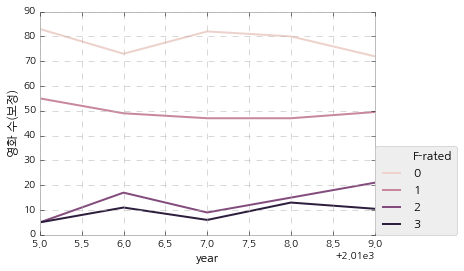

In [194]:
# 연도별 F-rated 등급 비율의 변화
data = df.groupby(['year', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax=sns.lineplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)
plt.legend(loc=[1,0])
ax.set_facecolor('white')

(2019년 데이터는 8월까지 데이터를 이용해 보정값으로 계산)

F-rated 0, F-rated 1 등급은 줄어드는 중

F-rated 지수 2, 3 등급은 미미하지만 늘어나는 중

    → 전체적으로 서서히 F-rated 등급이 높아지고 있다고 볼 수 있음

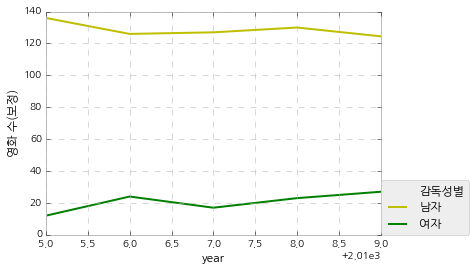

In [200]:
### 연도별 대표감독 성비 변화 추이
data = df.groupby(['year', '감독성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='감독성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])
ax.set_facecolor('white')

대표감독, 대표작가, 주연배우 중 성비가 가장 크게 차이나는 것은 대표감독 

    여성 1: 남성 7
    
여성 대표감독 수는 느리지만 꾸준히 늘고있는 것으로 보인다

    2016년에 2배가량 증가 이후 2017년 감소

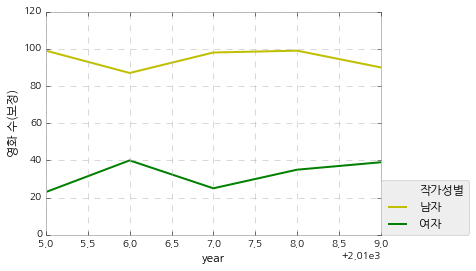

In [202]:
### 연도별 대표작가 성비 변화 추이
data = df.groupby(['year', '작가성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='작가성별', data=data, palette=['y', 'g'])
plt.ylim([0, 120])
plt.legend(loc=[1,0])
ax.set_facecolor('white')

2016년에 F-rated 변동이 컸던 것은 대표작가 때문인 것으로 확인

    → 여성 대표작가 수가 2016년에 가장 늘어남 2배 가량

이후 2017년 다시 2015년 수준으로 감소했지만 다시 늘고 있음

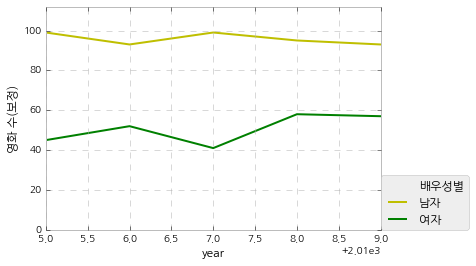

In [204]:
### 연도별 주연배우 성비 변화 추이
data = df.groupby(['year', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='배우성별', data=data, palette=['y', 'g'])
plt.ylim([0, 112])
plt.legend(loc=[1,0])
ax.set_facecolor('white')

대표감독, 대표작가, 주연배우 중에서 주연배우가 여성 비율이 가장 큼
    
    여성 1: 남성2
    
2016년에 여성주연 늘어났다가 2017년에 줄어듬

    2018년에 다시 2016년 수준으로 늘어남

남성주연 수에 큰 변화 없음
    
    아주 미미하게 줄어드는 것으로 보임

# 상영횟수등급 - F-rated

In [ ]:
# 상영횟수등급(가칭)에 따른 F-rated 등급 비율의 변화

In [ ]:
# 상영횟수등급 중위값에서 F-rated 등급이 높다 (상영횟수등급 낮을수록 에로영화 많고, 고예산 영화는 알탕)

# 추가하고 싶은 컬럼
- 감독 필모 갯수
- 작가 필모 갯수
- 배우 필모 갯수


- 감독 여러명인 경우 성비
- 작가 여러명인 경우 성비